# Importing Libraries and Setting Displaying Options

In [ ]:
import pandas as pd
import numpy as np
import pyarrow.feather as feather

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:

# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


# Importing Prepared Data

In [ ]:
players =pd.read_csv('/data/versatile_players.csv', low_memory=False)
players.head()

,Unnamed: 0,player_name,player_name_position,competition_name,area_name,division_levels,seasons_in_position,teams,birthdate,height,mins_played,90s,age,player_match_possession,opponent_possession_time,retention,pct_dribbles_stopped,aerials_success_rate,shots,np_goals,shotsontarget,np_xg,shotsblocked,goals,headshots,np_shots,assists,secondassists,redcards,directredcards,offensiveduelswon,yellowcards,padj_defensiveduels,padj_interceptions,padj_pressingduels,padj_clearances,padj_fouls,padj_counterpressingrecoveries,padj_def_action,padj_blocked_shot,padj_balls_won,padj_tackles_and_interceptions,padj_accelerations,padj_backpasses,padj_crosses,padj_dangerousownhalflosses,padj_foulssuffered,padj_dribbles,padj_forwardpasses,padj_keypasses,padj_lateralpasses,padj_foulssuffered.1,padj_longpasses,padj_offensiveduels,padj_offensiveduelswon,padj_ownhalflosses,padj_passes,padj_passestofinalthird,padj_progressivepasses,padj_progressiverun,padj_receivedpass,padj_shotassists,padj_shotontargetassists,padj_smartpasses,padj_successfulattackingactions,padj_successfulbackpasses,padj_successfulcrosses,padj_successfuldribbles,padj_successfulkeypasses,padj_successfullinkupplays,padj_successfulpasses,padj_successfulpassestofinalthird,padj_successfulprogressivepasses,padj_successfulsmartpasses,padj_successfulthroughpasses,padj_throughpasses,padj_touches_inside_box,padj_xgassist,padj_xgshot,padj_buildup_prog_passes,padj_buildup_direct_passes,padj_line_breaking_passes,padj_transition_line_breaking_passes,padj_line_breaking_passes_received,padj_transition_line_breaking_passes_received,padj_switches_received,padj_through_balls_received,padj_passes_and_touches_inside_box,padj_chances_created,padj_dangerousopponenthalfrecoveries,padj_defensiveduelswon,padj_dribblesagainst,padj_dribblesagainstwon,padj_duels,padj_duelswon,padj_opponenthalfrecoveries,padj_recoveries,padj_slidingtackles,padj_successfuldefensiveaction,padj_def_action_first_third,padj_def_action_middle_third,padj_def_action_final_third,padj_tackle,shots_per_90,np_goals_per_90,shotsontarget_per_90,np_xg_per_90,shotsblocked_per_90,goals_per_90,headshots_per_90,np_shots_per_90,assists_per_90,secondassists_per_90,redcards_per_90,directredcards_per_90,offensiveduelswon_per_90,yellowcards_per_90,padj_defensiveduels_per_90,padj_interceptions_per_90,padj_pressingduels_per_90,padj_clearances_per_90,padj_fouls_per_90,padj_counterpressingrecoveries_per_90,padj_def_action_per_90,padj_blocked_shot_per_90,padj_balls_won_per_90,padj_tackles_and_interceptions_per_90,padj_accelerations_per_90,padj_backpasses_per_90,padj_crosses_per_90,padj_dangerousownhalflosses_per_90,padj_foulssuffered_per_90,padj_dribbles_per_90,padj_forwardpasses_per_90,padj_keypasses_per_90,padj_lateralpasses_per_90,padj_longpasses_per_90,padj_offensiveduels_per_90,padj_offensiveduelswon_per_90,padj_ownhalflosses_per_90,padj_passes_per_90,padj_passestofinalthird_per_90,padj_progressivepasses_per_90,padj_progressiverun_per_90,padj_receivedpass_per_90,padj_shotassists_per_90,padj_shotontargetassists_per_90,padj_smartpasses_per_90,padj_successfulattackingactions_per_90,padj_successfulbackpasses_per_90,padj_successfulcrosses_per_90,padj_successfuldribbles_per_90,padj_successfulkeypasses_per_90,padj_successfullinkupplays_per_90,padj_successfulpasses_per_90,padj_successfulpassestofinalthird_per_90,padj_successfulprogressivepasses_per_90,padj_successfulsmartpasses_per_90,padj_successfulthroughpasses_per_90,padj_throughpasses_per_90,padj_touches_inside_box_per_90,padj_xgassist_per_90,padj_xgshot_per_90,padj_buildup_prog_passes_per_90,padj_buildup_direct_passes_per_90,padj_line_breaking_passes_per_90,padj_transition_line_breaking_passes_per_90,padj_line_breaking_passes_received_per_90,padj_transition_line_breaking_passes_received_per_90,padj_switches_received_per_90,padj_through_balls_received_per_90,padj_passes_and_touches_inside_box_per_90,padj_chances_created_per_90,padj_dangerousopponenthalfrecoveries_per_90,padj_defensiveduelswon_per_90,padj_dribbl

In [ ]:
for col in players.columns:
  print(col)

Unnamed: 0
player_name
player_name_position
competition_name
area_name
division_levels
seasons_in_position
teams
birthdate
height
mins_played
90s
age
player_match_possession
opponent_possession_time
retention
pct_dribbles_stopped
aerials_success_rate
shots
np_goals
shotsontarget
np_xg
shotsblocked
goals
headshots
np_shots
assists
secondassists
redcards
directredcards
offensiveduelswon
yellowcards
padj_defensiveduels
padj_interceptions
padj_pressingduels
padj_clearances
padj_fouls
padj_counterpressingrecoveries
padj_def_action
padj_blocked_shot
padj_balls_won
padj_tackles_and_interceptions
padj_accelerations
padj_backpasses
padj_crosses
padj_dangerousownhalflosses
padj_foulssuffered
padj_dribbles
padj_forwardpasses
padj_keypasses
padj_lateralpasses
padj_foulssuffered.1
padj_longpasses
padj_offensiveduels
padj_offensiveduelswon
padj_ownhalflosses
padj_passes
padj_passestofinalthird
padj_progressivepasses
padj_progressiverun
padj_receivedpass
padj_shotassists
padj_shotontargetassists
padj

# Chosing the normalized possession-adjusted features

In [ ]:
cols_to_use=['player_name','player_name_position','competition_name','area_name','division_levels','seasons_in_position','teams','birthdate',
             'height','mins_played','90s','age','player_match_possession','opponent_possession_time','retention','pct_dribbles_stopped',
              'aerials_success_rate','shots_per_90','np_goals_per_90', 'shotsontarget_per_90', 'np_xg_per_90',
              'shotsblocked_per_90','goals_per_90', 'headshots_per_90', 'np_shots_per_90', 'assists_per_90', 'secondassists_per_90',
              'redcards_per_90', 'directredcards_per_90', 'yellowcards_per_90','padj_defensiveduels_per_90',
              'padj_interceptions_per_90', 'padj_pressingduels_per_90', 'padj_clearances_per_90', 'padj_fouls_per_90',
              'padj_counterpressingrecoveries_per_90', 'padj_def_action_per_90', 'padj_blocked_shot_per_90', 'padj_balls_won_per_90',
              'padj_tackles_and_interceptions_per_90','padj_accelerations_per_90','padj_backpasses_per_90', 'padj_crosses_per_90',
              'padj_dangerousownhalflosses_per_90','padj_foulssuffered_per_90','padj_dribbles_per_90','padj_forwardpasses_per_90',
              'padj_keypasses_per_90','padj_lateralpasses_per_90','padj_longpasses_per_90','padj_offensiveduels_per_90',
              'padj_offensiveduelswon_per_90','padj_ownhalflosses_per_90','padj_passes_per_90','padj_passestofinalthird_per_90',
              'padj_progressivepasses_per_90','padj_progressiverun_per_90','padj_receivedpass_per_90','padj_shotassists_per_90',
              'padj_shotontargetassists_per_90','padj_smartpasses_per_90','padj_successfulattackingactions_per_90',
              'padj_successfulbackpasses_per_90','padj_successfulcrosses_per_90','padj_successfuldribbles_per_90',
              'padj_successfulkeypasses_per_90','padj_successfullinkupplays_per_90','padj_successfulpasses_per_90',
              'padj_successfulpassestofinalthird_per_90','padj_successfulprogressivepasses_per_90','padj_successfulsmartpasses_per_90',
              'padj_successfulthroughpasses_per_90','padj_throughpasses_per_90','padj_touches_inside_box_per_90','padj_xgassist_per_90',
              'padj_xgshot_per_90','padj_buildup_prog_passes_per_90','padj_buildup_direct_passes_per_90','padj_line_breaking_passes_per_90',
              'padj_transition_line_breaking_passes_per_90','padj_line_breaking_passes_received_per_90',
              'padj_transition_line_breaking_passes_received_per_90','padj_switches_received_per_90','padj_through_balls_received_per_90',
              'padj_passes_and_touches_inside_box_per_90','padj_chances_created_per_90','padj_dangerousopponenthalfrecoveries_per_90',
              'padj_defensiveduelswon_per_90','padj_dribblesagainst_per_90', 'padj_dribblesagainstwon_per_90','padj_duels_per_90',
              'padj_duelswon_per_90','padj_opponenthalfrecoveries_per_90', 'padj_recoveries_per_90',
              'padj_slidingtackles_per_90','padj_successfuldefensiveaction_per_90', 'padj_def_action_first_third_per_90',
              'padj_def_action_middle_third_per_90','padj_def_action_final_third_per_90','padj_tackle_per_90']
relevent_players_stats = players[cols_to_use]
relevent_players_stats.head()

,player_name,player_name_position,competition_name,area_name,division_levels,seasons_in_position,teams,birthdate,height,mins_played,90s,age,player_match_possession,opponent_possession_time,retention,pct_dribbles_stopped,aerials_success_rate,shots_per_90,np_goals_per_90,shotsontarget_per_90,np_xg_per_90,shotsblocked_per_90,goals_per_90,headshots_per_90,np_shots_per_90,assists_per_90,secondassists_per_90,redcards_per_90,directredcards_per_90,yellowcards_per_90,padj_defensiveduels_per_90,padj_interceptions_per_90,padj_pressingduels_per_90,padj_clearances_per_90,padj_fouls_per_90,padj_counterpressingrecoveries_per_90,padj_def_action_per_90,padj_blocked_shot_per_90,padj_balls_won_per_90,padj_tackles_and_interceptions_per_90,padj_accelerations_per_90,padj_backpasses_per_90,padj_crosses_per_90,padj_dangerousownhalflosses_per_90,padj_foulssuffered_per_90,padj_dribbles_per_90,padj_forwardpasses_per_90,padj_keypasses_per_90,padj_lateralpasses_per_90,padj_longpasses_per_90,padj_offensiveduels_per_90,padj_offensiveduelswon_per_90,padj_ownhalflosses_per_90,padj_passes_per_90,padj_passestofinalthird_per_90,padj_progressivepasses_per_90,padj_progressiverun_per_90,padj_receivedpass_per_90,padj_shotassists_per_90,padj_shotontargetassists_per_90,padj_smartpasses_per_90,padj_successfulattackingactions_per_90,padj_successfulbackpasses_per_90,padj_successfulcrosses_per_90,padj_successfuldribbles_per_90,padj_successfulkeypasses_per_90,padj_successfullinkupplays_per_90,padj_successfulpasses_per_90,padj_successfulpassestofinalthird_per_90,padj_successfulprogressivepasses_per_90,padj_successfulsmartpasses_per_90,padj_successfulthroughpasses_per_90,padj_throughpasses_per_90,padj_touches_inside_box_per_90,padj_xgassist_per_90,padj_xgshot_per_90,padj_buildup_prog_passes_per_90,padj_buildup_direct_passes_per_90,padj_line_breaking_passes_per_90,padj_transition_line_breaking_passes_per_90,padj_line_breaking_passes_received_per_90,padj_transition_line_breaking_passes_received_per_90,padj_switches_received_per_90,padj_through_balls_received_per_90,padj_passes_and_touches_inside_box_per_90,padj_chances_created_per_90,padj_dangerousopponenthalfrecoveries_per_90,padj_defensiveduelswon_per_90,padj_dribblesagainst_per_90,padj_dribblesagainstwon_per_90,padj_duels_per_90,padj_duelswon_per_90,padj_opponenthalfrecoveries_per_90,padj_recoveries_per_90,padj_slidingtackles_per_90,padj_successfuldefensiveaction_per_90,padj_def_action_first_third_per_90,padj_def_action_middle_third_per_90,padj_def_action_final_third_per_90,padj_tackle_per_90
0,Aaron Bolger,Aaron Bolger_#8,Premier Division,Ireland Republic,1,3,Longford Town+St. Patrick's Ath.+Cork City,2000-02-02,170,1016,11.29,24,0.481270,59.711238,0.838108,0.258621,0.466666,0.27,0.0,0.00,0.00,0.18,0.0,0.00,0.27,0.09,0.00,0.0,0.0,0.44,8.26,5.63,3.33,1.19,2.40,6.14,13.23,0.17,7.11,14.01,202.45,1637.97,331.28,18.40,239.25,441.70,2797.44,55.21,2521.38,1067.44,1343.51,699.36,901.81,7969.02,1398.72,1472.34,294.47,4564.24,73.62,55.21,55.21,331.28,1564.36,110.43,276.06,55.21,0.00,6202.22,846.59,1049.04,0.0,0.00,147.23,496.91,15.46,0.55,220.85,147.23,1141.06,441.70,846.59,220.85,73.62,73.62,496.91,92.02,0.09,0.71,1.56,0.85,10.86,3.74,1.69,4.94,0.27,5.87,2.36,3.60,0.85,0.67
1,Aaron Bolger,Aaron Bolger_double pivot,Premier Division,Ireland Republic,1,3,Longford Town+St. Patrick's Ath.+Cork City,2000-02-02,170,1618,17.98,24,0.458173,59.725096,0.780638,0.191697,0.277778,0.83,0.0,0.28,0.03,0.33,0.0,0.06,0.83,0.06,0.00,0.0,0.0,0.50,8.36,3.99,2.92,0.87,2.18,5.76,11.97,0.19,5.80,12.38,194.22,1735.87,121.39,133.53,315.61,400.58,3083.29,24.28,2488.48,971.11,1262.45,631.22,995.39,8667.20,1468.81,1468.81,291.33,5122.63,60.69,24.28,24.28,267.06,1687.31,36.42,254.92,24.28,12.14,6943.47,898.28,861.86,0.0,0.00,60.69,230.64,3.88,7.28,242.78,182.08,1505.23,643.36,825.45,303.47,36.42,24.28,230.64,84.97,0.25,0.95,1.42,0.64,9.92,3.60,2.10,5.11,0.45,5.11,2.37,3.18,0.81,0.81
2,Aaron Bolger,Aaron Bolger_single pivot,Premier Division,Ireland Republic,1,1,

# Selecting the positive and negative features of in and out-of possession play

In [ ]:
in_possession_positive_metrics= ['retention','shots_per_90','np_goals_per_90', 'shotsontarget_per_90', 'np_xg_per_90',
              'shotsblocked_per_90','goals_per_90', 'headshots_per_90', 'np_shots_per_90', 'assists_per_90', 'secondassists_per_90',
              'padj_accelerations_per_90', 'padj_crosses_per_90''padj_foulssuffered_per_90','padj_dribbles_per_90','padj_forwardpasses_per_90',
              'padj_keypasses_per_90','padj_lateralpasses_per_90','padj_longpasses_per_90','padj_offensiveduels_per_90',
              'padj_offensiveduelswon_per_90','padj_passes_per_90','padj_passestofinalthird_per_90',
              'padj_progressivepasses_per_90','padj_progressiverun_per_90','padj_receivedpass_per_90','padj_shotassists_per_90',
              'padj_shotontargetassists_per_90','padj_smartpasses_per_90','padj_successfulattackingactions_per_90',
              'padj_successfulcrosses_per_90','padj_successfuldribbles_per_90','padj_successfulkeypasses_per_90','padj_successfullinkupplays_per_90',
              'padj_successfulpasses_per_90','padj_successfulpassestofinalthird_per_90','padj_successfulprogressivepasses_per_90','padj_successfulsmartpasses_per_90',
              'padj_successfulthroughpasses_per_90','padj_throughpasses_per_90','padj_touches_inside_box_per_90','padj_xgassist_per_90',
              'padj_xgshot_per_90','padj_buildup_prog_passes_per_90','padj_buildup_direct_passes_per_90','padj_line_breaking_passes_per_90',
              'padj_transition_line_breaking_passes_per_90','padj_line_breaking_passes_received_per_90',
              'padj_transition_line_breaking_passes_received_per_90','padj_switches_received_per_90','padj_through_balls_received_per_90',
              'padj_passes_and_touches_inside_box_per_90','padj_chances_created_per_90']

in_possession_negative_metrics = ['padj_backpasses_per_90','padj_dangerousownhalflosses_per_90','padj_ownhalflosses_per_90','padj_successfulbackpasses_per_90',]

out_of_possession_positive_metrics = ['pct_dribbles_stopped','aerials_success_rate'
    'padj_defensiveduels_per_90', 'padj_interceptions_per_90', 'padj_pressingduels_per_90', 'padj_clearances_per_90',
    'padj_counterpressingrecoveries_per_90', 'padj_def_action_per_90', 'padj_blocked_shot_per_90', 'padj_balls_won_per_90',
    'padj_tackles_and_interceptions_per_90', 'padj_dangerousopponenthalfrecoveries_per_90', 'padj_defensiveduelswon_per_90',
    'padj_dribblesagainst_per_90', 'padj_dribblesagainstwon_per_90', 'padj_duels_per_90', 'padj_duelswon_per_90',
    'padj_opponenthalfrecoveries_per_90', 'padj_recoveries_per_90', 'padj_slidingtackles_per_90', 'padj_successfuldefensiveaction_per_90',
    'padj_def_action_first_third_per_90', 'padj_def_action_middle_third_per_90', 'padj_def_action_final_third_per_90',
    'padj_tackle_per_90'
]
out_of_possession_negative_metrics = ['redcards_per_90', 'directredcards_per_90', 'yellowcards_per_90', 'padj_fouls_per_90', 'padj_foulssuffered_per_90']


# In-Possession Features' weights and Scoring

In [ ]:
# Define your metrics and weights
in_possession_positive_metrics = {
    'retention': 0.3, 'shots_per_90': 0.3, 'np_goals_per_90': 0.5, 'shotsontarget_per_90': 0.3, 'np_xg_per_90': 0.5,
    'shotsblocked_per_90': 0.2, 'goals_per_90': 0.5, 'headshots_per_90': 0.2, 'np_shots_per_90': 0.2, 'assists_per_90': 0.5,
    'secondassists_per_90': 0.3, 'padj_accelerations_per_90': 0.2, 'padj_crosses_per_90': 0.2, 'padj_foulssuffered_per_90': 0.2,
    'padj_dribbles_per_90': 0.2, 'padj_forwardpasses_per_90': 0.3, 'padj_keypasses_per_90': 0.4, 'padj_lateralpasses_per_90': 0.2,
    'padj_longpasses_per_90': 0.2, 'padj_offensiveduels_per_90': 0.2, 'padj_offensiveduelswon_per_90': 0.2, 'padj_passes_per_90': 0.2,
    'padj_passestofinalthird_per_90': 0.3, 'padj_progressivepasses_per_90': 0.3, 'padj_progressiverun_per_90': 0.3,
    'padj_receivedpass_per_90': 0.2, 'padj_shotassists_per_90': 0.3, 'padj_shotontargetassists_per_90': 0.3, 'padj_smartpasses_per_90': 0.3,
    'padj_successfulattackingactions_per_90': 0.3, 'padj_successfulcrosses_per_90': 0.2, 'padj_successfuldribbles_per_90': 0.2,
    'padj_successfulkeypasses_per_90': 0.4, 'padj_successfullinkupplays_per_90': 0.2, 'padj_successfulpasses_per_90': 0.2,
    'padj_successfulpassestofinalthird_per_90': 0.3, 'padj_successfulprogressivepasses_per_90': 0.3, 'padj_successfulsmartpasses_per_90': 0.3,
    'padj_successfulthroughpasses_per_90': 0.3, 'padj_throughpasses_per_90': 0.3, 'padj_touches_inside_box_per_90': 0.3,
    'padj_xgassist_per_90': 0.3, 'padj_xgshot_per_90': 0.3, 'padj_buildup_prog_passes_per_90': 0.2, 'padj_buildup_direct_passes_per_90': 0.2,
    'padj_line_breaking_passes_per_90': 0.3, 'padj_transition_line_breaking_passes_per_90': 0.3, 'padj_line_breaking_passes_received_per_90': 0.2,
    'padj_transition_line_breaking_passes_received_per_90': 0.2, 'padj_switches_received_per_90': 0.2, 'padj_through_balls_received_per_90': 0.2,
    'padj_passes_and_touches_inside_box_per_90': 0.2, 'padj_chances_created_per_90': 0.3
}

in_possession_negative_metrics = {
    'padj_backpasses_per_90': -0.2, 'padj_dangerousownhalflosses_per_90': -0.3, 'padj_ownhalflosses_per_90': -0.5, 'padj_successfulbackpasses_per_90': -0.2
}


## Top Players in Possession

In [ ]:
# Normalize the metrics
scaler = MinMaxScaler()

# Combine the metrics for normalization
all_metrics = list(in_possession_positive_metrics.keys()) + list(in_possession_negative_metrics.keys())
normalized_data = pd.DataFrame(scaler.fit_transform(relevent_players_stats[all_metrics]), columns=all_metrics)

# Invert the negative metrics to represent their negative impact
for metric in in_possession_negative_metrics.keys():
    normalized_data[metric] *= -1

# Calculate in-possession score
def calculate_weighted_score(row, metrics_weights):
    score = 0
    for metric, weight in metrics_weights.items():
        score += row[metric] * weight
    return score

relevent_players_stats['in_possession_score'] = normalized_data.apply(calculate_weighted_score, axis=1, metrics_weights=in_possession_positive_metrics)
relevent_players_stats['in_possession_score'] += normalized_data.apply(calculate_weighted_score, axis=1, metrics_weights=in_possession_negative_metrics)

# Display top players based on in-possession score
top_players_in_possession = relevent_players_stats[['player_name', 'player_name_position', 'in_possession_score']].sort_values(by='in_possession_score', ascending=False).head(10)



# Display the top players
top_players_in_possession

<ipython-input-9-a164e672b7a4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevent_players_stats['in_possession_score'] = normalized_data.apply(calculate_weighted_score, axis=1, metrics_weights=in_possession_positive_metrics)
<ipython-input-9-a164e672b7a4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevent_players_stats['in_possession_score'] += normalized_data.apply(calculate_weighted_score, axis=1, metrics_weights=in_possession_negative_metrics)


,player_name,player_name_position,in_possession_score
3566,Leomar David Mosquera Niño,Leomar David Mosquera Niño_#8,9.377436
120,Adem Zorgane,Adem Zorgane_double pivot,6.989763
2345,Giorgi Moistsrapishvili,Giorgi Moistsrapishvili_double pivot,6.934698
1927,Erik Ahlstrand,Erik Ahlstrand_#8,6.813374
3543,Lazar Pavlović,Lazar Pavlović_double pivot,6.746343
6351,Łukasz Łakomy,Łukasz Łakomy_double pivot,6.580702
4901,Orkun Kökçü,Orkun Kökçü_single pivot,6.398901
4931,Othman Boussaid,Othman Boussaid_#8,6.213944
1939,Erkan Eyibil,Erkan Eyibil_double pivot,6.178716
4835,Oihan Sancet Tirapu,Oihan Sancet Tirapu_#8,6.166111


# Out-of Possession Features' Weigthing and Scoring

In [ ]:
# Define your metrics and weights
out_of_possession_positive_metrics = {
    'pct_dribbles_stopped': 0.3, 'aerials_success_rate': 0.3, 'padj_defensiveduels_per_90': 0.3, 'padj_interceptions_per_90': 0.5,
    'padj_pressingduels_per_90': 0.3, 'padj_clearances_per_90': 0.2, 'padj_counterpressingrecoveries_per_90': 0.3, 'padj_def_action_per_90': 0.3,
    'padj_blocked_shot_per_90': 0.2, 'padj_balls_won_per_90': 0.3, 'padj_tackles_and_interceptions_per_90': 0.5, 'padj_dangerousopponenthalfrecoveries_per_90': 0.5,
    'padj_defensiveduelswon_per_90': 0.5, 'padj_dribblesagainst_per_90': 0.2, 'padj_dribblesagainstwon_per_90': 0.4, 'padj_duels_per_90': 0.2,
    'padj_duelswon_per_90': 0.4, 'padj_opponenthalfrecoveries_per_90': 0.4, 'padj_recoveries_per_90': 0.3, 'padj_slidingtackles_per_90': 0.2,
    'padj_successfuldefensiveaction_per_90': 0.4, 'padj_def_action_first_third_per_90': 0.2, 'padj_def_action_middle_third_per_90': 0.3,
    'padj_def_action_final_third_per_90': 0.4, 'padj_tackle_per_90': 0.2
}

out_of_possession_negative_metrics = {
    'redcards_per_90': -0.5, 'directredcards_per_90': -0.5, 'yellowcards_per_90': -0.3, 'padj_fouls_per_90': -0.2
}

# Normalize the metrics
scaler = MinMaxScaler()

# Combine the metrics for normalization
all_metrics = list(out_of_possession_positive_metrics.keys()) + list(out_of_possession_negative_metrics.keys())
normalized_data = pd.DataFrame(scaler.fit_transform(relevent_players_stats[all_metrics]), columns=all_metrics)

# Invert the negative metrics to represent their negative impact
for metric in out_of_possession_negative_metrics.keys():
    normalized_data[metric] *= -1

# Calculate out-of-possession score
def calculate_weighted_score(row, metrics_weights):
    score = 0
    for metric, weight in metrics_weights.items():
        score += row[metric] * weight
    return score

relevent_players_stats['out_of_possession_score'] = normalized_data.apply(calculate_weighted_score, axis=1, metrics_weights=out_of_possession_positive_metrics)
relevent_players_stats['out_of_possession_score'] += normalized_data.apply(calculate_weighted_score, axis=1, metrics_weights=out_of_possession_negative_metrics)

# Display top players based on out-of-possession score
top_players_out_of_possession = relevent_players_stats[['player_name', 'player_name_position', 'out_of_possession_score']].sort_values(by='out_of_possession_score', ascending=False).head(10)



# Display the top players
top_players_out_of_possession

<ipython-input-10-ac151d666779>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevent_players_stats['out_of_possession_score'] = normalized_data.apply(calculate_weighted_score, axis=1, metrics_weights=out_of_possession_positive_metrics)
<ipython-input-10-ac151d666779>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevent_players_stats['out_of_possession_score'] += normalized_data.apply(calculate_weighted_score, axis=1, metrics_weights=out_of_possession_negative_metrics)


,player_name,player_name_position,out_of_possession_score
341,Alessandro Mercati,Alessandro Mercati_double pivot,5.218901
1465,David Mištrafović,David Mištrafović_single pivot,5.119354
4082,Markus Soomets,Markus Soomets_#8,5.026148
3942,Marcelencio Esajas,Marcelencio Esajas_#8,4.981153
3248,Justin Omoregie,Justin Omoregie_double pivot,4.862440
4645,Nicky Stephane Medja Beloko,Nicky Stephane Medja Beloko_single pivot,4.838861
6251,Yuto Tsunashima,Yuto Tsunashima_double pivot,4.798075
3335,Kevin Alexander Lopez Saldarriaga,Kevin Alexander Lopez Saldarriaga_single pivot,4.793958
2673,Itay Katzav,Itay Katzav_#8,4.761315
1995,Fabio Saiz Pennarossa,Fabio Saiz Pennarossa_single pivot,4.752179


# Overall Score

In [ ]:
# Normalize 90s played and age
relevent_players_stats['90s_normalized'] = scaler.fit_transform(relevent_players_stats[['90s']])
relevent_players_stats['age_normalized'] = scaler.fit_transform(relevent_players_stats[['age']])
relevent_players_stats['age_normalized'] = 1 - relevent_players_stats['age_normalized']  # Invert age to give higher scores to younger players

# Define weights for 90s played and age
weight_90s = 0.3
weight_age = 0.3

# Calculate overall score
relevent_players_stats['overall_score'] = (relevent_players_stats['in_possession_score'] + relevent_players_stats['out_of_possession_score']) / 2 + \
                        weight_90s * relevent_players_stats['90s_normalized'] + weight_age * relevent_players_stats['age_normalized']

# Display top players based on overall score
top_players_overall = relevent_players_stats[['player_name', 'player_name_position', 'competition_name', 'area_name', 'division_levels', 'seasons_in_position',
                            'teams', 'birthdate', 'height', 'mins_played', '90s', 'age', 'player_match_possession', 'opponent_possession_time',
                            'in_possession_score', 'out_of_possession_score', 'overall_score']].sort_values(by='overall_score', ascending=False).head(10)


# Display the top players
# Display the top players
overall=top_players_overall[['player_name', 'player_name_position','overall_score']].sort_values(by='overall_score', ascending=False).head(10)
overall

<ipython-input-11-4baf849c940b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevent_players_stats['90s_normalized'] = scaler.fit_transform(relevent_players_stats[['90s']])
<ipython-input-11-4baf849c940b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevent_players_stats['age_normalized'] = scaler.fit_transform(relevent_players_stats[['age']])
<ipython-input-11-4baf849c940b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,player_name,player_name_position,overall_score
3566,Leomar David Mosquera Niño,Leomar David Mosquera Niño_#8,6.175085
39,Abdul Razak Yusif,Abdul Razak Yusif_single pivot,5.221998
4159,Mateusz Kowalczyk,Mateusz Kowalczyk_single pivot,4.974610
2345,Giorgi Moistsrapishvili,Giorgi Moistsrapishvili_double pivot,4.969513
4070,Marko Šimun,Marko Šimun_#8,4.885051
120,Adem Zorgane,Adem Zorgane_double pivot,4.879553
6351,Łukasz Łakomy,Łukasz Łakomy_double pivot,4.831873
3543,Lazar Pavlović,Lazar Pavlović_double pivot,4.786168
4072,Markus Arsalo,Markus Arsalo_single pivot,4.777998
4566,Mylian Jiménez,Mylian Jiménez_single pivot,4.767817


# Percentile Rank

In [ ]:
# Calculate percentiles
relevent_players_stats['in_possession_percentile'] = relevent_players_stats['in_possession_score'].rank(pct=True)
relevent_players_stats['out_of_possession_percentile'] = relevent_players_stats['out_of_possession_score'].rank(pct=True)
relevent_players_stats['overall_percentile'] = relevent_players_stats['overall_score'].rank(pct=True)

# Display top players based on overall score
top_players_overall = relevent_players_stats[['player_name', 'player_name_position', 'competition_name', 'area_name', 'division_levels', 'seasons_in_position',
                            'teams', 'birthdate', 'height', 'mins_played', '90s', 'age', 'player_match_possession', 'opponent_possession_time',
                            'in_possession_score', 'out_of_possession_score', 'overall_score', 'in_possession_percentile',
                            'out_of_possession_percentile', 'overall_percentile']].sort_values(by='overall_score', ascending=False).head(10)




top_players_overall.head()

<ipython-input-12-04d1d2b901f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevent_players_stats['in_possession_percentile'] = relevent_players_stats['in_possession_score'].rank(pct=True)
<ipython-input-12-04d1d2b901f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevent_players_stats['out_of_possession_percentile'] = relevent_players_stats['out_of_possession_score'].rank(pct=True)
<ipython-input-12-04d1d2b901f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,player_name,player_name_position,competition_name,area_name,division_levels,seasons_in_position,teams,birthdate,height,mins_played,90s,age,player_match_possession,opponent_possession_time,in_possession_score,out_of_possession_score,overall_score,in_possession_percentile,out_of_possession_percentile,overall_percentile
3566,Leomar David Mosquera Niño,Leomar David Mosquera Niño_#8,Primera División,Venezuela,1,3,Zamora+Inter de Barinas,2001-05-18,174,547,6.08,23,0.476470,59.714118,9.377436,2.870631,6.175085,1.000000,0.632820,1.000000
39,Abdul Razak Yusif,Abdul Razak Yusif_single pivot,A.LeCoq Premium Liiga,Estonia,1,1,Paide,2001-08-09,181,314,3.49,23,0.591246,59.645252,5.686666,4.670663,5.221998,0.995599,0.997799,0.999843
4159,Mateusz Kowalczyk,Mateusz Kowalczyk_single pivot,I Liga,Poland,2,1,Łódzki KS,2004-04-16,181,336,3.73,20,0.508561,59.694864,5.502551,4.101429,4.974610,0.992455,0.981924,0.999686
2345,Giorgi Moistsrapishvili,Giorgi Moistsrapishvili_double pivot,Erovnuli Liga+Challenger Pro League,Georgia+Belgium,2+1,5,Dinamo Tbilisi+SK Beveren,2001-09-29,183,935,10.39,23,0.606169,59.636299,6.934698,2.876540,4.969513,0.999686,0.635964,0.999528
4070,Marko Šimun,Marko Šimun_#8,First League,Montenegro,1,2,Jezero,2001-06-16,0,681,7.57,23,0.371847,59.776892,5.810664,3.848455,4.885051,0.996699,0.962748,0.999371


In [ ]:
relevent_players_stats[relevent_players_stats['player_name']=='Abdul Razak Yusif']

,player_name,player_name_position,competition_name,area_name,division_levels,seasons_in_position,teams,birthdate,height,mins_played,90s,age,player_match_possession,opponent_possession_time,retention,pct_dribbles_stopped,aerials_success_rate,shots_per_90,np_goals_per_90,shotsontarget_per_90,np_xg_per_90,shotsblocked_per_90,goals_per_90,headshots_per_90,np_shots_per_90,assists_per_90,secondassists_per_90,redcards_per_90,directredcards_per_90,yellowcards_per_90,padj_defensiveduels_per_90,padj_interceptions_per_90,padj_pressingduels_per_90,padj_clearances_per_90,padj_fouls_per_90,padj_counterpressingrecoveries_per_90,padj_def_action_per_90,padj_blocked_shot_per_90,padj_balls_won_per_90,padj_tackles_and_interceptions_per_90,padj_accelerations_per_90,padj_backpasses_per_90,padj_crosses_per_90,padj_dangerousownhalflosses_per_90,padj_foulssuffered_per_90,padj_dribbles_per_90,padj_forwardpasses_per_90,padj_keypasses_per_90,padj_lateralpasses_per_90,padj_longpasses_per_90,padj_offensiveduels_per_90,padj_offensiveduelswon_per_90,padj_ownhalflosses_per_90,padj_passes_per_90,padj_passestofinalthird_per_90,padj_progressivepasses_per_90,padj_progressiverun_per_90,padj_receivedpass_per_90,padj_shotassists_per_90,padj_shotontargetassists_per_90,padj_smartpasses_per_90,padj_successfulattackingactions_per_90,padj_successfulbackpasses_per_90,padj_successfulcrosses_per_90,padj_successfuldribbles_per_90,padj_successfulkeypasses_per_90,padj_successfullinkupplays_per_90,padj_successfulpasses_per_90,padj_successfulpassestofinalthird_per_90,padj_successfulprogressivepasses_per_90,padj_successfulsmartpasses_per_90,padj_successfulthroughpasses_per_90,padj_throughpasses_per_90,padj_touches_inside_box_per_90,padj_xgassist_per_90,padj_xgshot_per_90,padj_buildup_prog_passes_per_90,padj_buildup_direct_passes_per_90,padj_line_breaking_passes_per_90,padj_transition_line_breaking_passes_per_90,padj_line_breaking_passes_received_per_90,padj_transition_line_breaking_passes_received_per_90,padj_switches_received_per_90,padj_through_balls_received_per_90,padj_passes_and_touches_inside_box_per_90,padj_chances_created_per_90,padj_dangerousopponenthalfrecoveries_per_90,padj_defensiveduelswon_per_90,padj_dribblesagainst_per_90,padj_dribblesagainstwon_per_90,padj_duels_per_90,padj_duelswon_per_90,padj_opponenthalfrecoveries_per_90,padj_recoveries_per_90,padj_slidingtackles_per_90,padj_successfuldefensiveaction_per_90,padj_def_action_first_third_per_90,padj_def_action_middle_third_per_90,padj_def_action_final_third_per_90,padj_tackle_per_90,in_possession_score,out_of_possession_score,90s_normalized,age_normalized,overall_score,in_possession_percentile,out_of_possession_percentile,overall_percentile
38,Abdul Razak Yusif,Abdul Razak Yusif_#8,A.LeCoq Premium Liiga,Estonia,1,2,Paide,2001-08-09,181,396,4.40,23,0.637870,59.617278,0.780729,0.649999,0.646616,2.05,0.23,0.45,0.26,0.45,0.23,0.68,2.05,0.23,0.0,0.00,0.00,0.00,8.23,6.57,0.63,2.38,1.06,9.75,16.46,0.0,8.08,14.73,0.0,1175.79,249.41,178.15,35.63,570.08,3171.07,106.89,3563.0,1638.98,1175.79,605.71,641.34,9121.27,2244.69,1674.61,356.3,6306.5,249.41,106.89,106.89,605.71,1175.79,142.52,463.19,106.89,0.0,7125.99,1353.94,1389.57,35.63,106.89,356.30,1175.79,38.84,41.33,213.78,391.93,1638.98,427.56,1175.79,356.30,35.63,178.15,1175.79,71.26,0.34,0.69,1.26,0.69,11.09,4.80,2.06,5.60,0.00,4.80,2.74,2.97,0.69,0.46,5.477273,3.413458,0.010628,0.142857,4.491411,0.992141,0.874568,0.996856
39,Abdul Razak Yusif,Abdul Razak Yusif_single pivot,A.LeCoq Premium Liiga,Estonia,1,1,Paide,2001-08-09,181,314,3.49,23,0.591246,59.645252,0.859031,0.333333,0.640000,2.01,0.57,1.43,0.40,0.00,0.57,0.29,2.01,0.29,0.0,0.29,0.29,0.29,6.80,8.55,0.68,4.93,1.31,9.89,20.79,0.0,10.50,14.91,0.0,920.79,48.46,242.31,48.46,193.85,3634.69,96.93,5040.1,1890.04,387.70,96.93,678.48,10807.14,2520.05,2229.28,0.0,8141.7,242.31,96.93,48.46,339.24,920.79,0.00,96.93,96.93,0.0,9353.27,1986.96,1696.19,0.00,0.00,96.93,339.24,9.69,68.33,0.00,387.70,3198.53,1356.95,1211.56,242.31,0.0

In [ ]:
relevent_players_stats[(relevent_players_stats['birthdate']=='2004-04-16') & (relevent_players_stats['height']==181)]

,player_name,player_name_position,competition_name,area_name,division_levels,seasons_in_position,teams,birthdate,height,mins_played,90s,age,player_match_possession,opponent_possession_time,retention,pct_dribbles_stopped,aerials_success_rate,shots_per_90,np_goals_per_90,shotsontarget_per_90,np_xg_per_90,shotsblocked_per_90,goals_per_90,headshots_per_90,np_shots_per_90,assists_per_90,secondassists_per_90,redcards_per_90,directredcards_per_90,yellowcards_per_90,padj_defensiveduels_per_90,padj_interceptions_per_90,padj_pressingduels_per_90,padj_clearances_per_90,padj_fouls_per_90,padj_counterpressingrecoveries_per_90,padj_def_action_per_90,padj_blocked_shot_per_90,padj_balls_won_per_90,padj_tackles_and_interceptions_per_90,padj_accelerations_per_90,padj_backpasses_per_90,padj_crosses_per_90,padj_dangerousownhalflosses_per_90,padj_foulssuffered_per_90,padj_dribbles_per_90,padj_forwardpasses_per_90,padj_keypasses_per_90,padj_lateralpasses_per_90,padj_longpasses_per_90,padj_offensiveduels_per_90,padj_offensiveduelswon_per_90,padj_ownhalflosses_per_90,padj_passes_per_90,padj_passestofinalthird_per_90,padj_progressivepasses_per_90,padj_progressiverun_per_90,padj_receivedpass_per_90,padj_shotassists_per_90,padj_shotontargetassists_per_90,padj_smartpasses_per_90,padj_successfulattackingactions_per_90,padj_successfulbackpasses_per_90,padj_successfulcrosses_per_90,padj_successfuldribbles_per_90,padj_successfulkeypasses_per_90,padj_successfullinkupplays_per_90,padj_successfulpasses_per_90,padj_successfulpassestofinalthird_per_90,padj_successfulprogressivepasses_per_90,padj_successfulsmartpasses_per_90,padj_successfulthroughpasses_per_90,padj_throughpasses_per_90,padj_touches_inside_box_per_90,padj_xgassist_per_90,padj_xgshot_per_90,padj_buildup_prog_passes_per_90,padj_buildup_direct_passes_per_90,padj_line_breaking_passes_per_90,padj_transition_line_breaking_passes_per_90,padj_line_breaking_passes_received_per_90,padj_transition_line_breaking_passes_received_per_90,padj_switches_received_per_90,padj_through_balls_received_per_90,padj_passes_and_touches_inside_box_per_90,padj_chances_created_per_90,padj_dangerousopponenthalfrecoveries_per_90,padj_defensiveduelswon_per_90,padj_dribblesagainst_per_90,padj_dribblesagainstwon_per_90,padj_duels_per_90,padj_duelswon_per_90,padj_opponenthalfrecoveries_per_90,padj_recoveries_per_90,padj_slidingtackles_per_90,padj_successfuldefensiveaction_per_90,padj_def_action_first_third_per_90,padj_def_action_middle_third_per_90,padj_def_action_final_third_per_90,padj_tackle_per_90,in_possession_score,out_of_possession_score,90s_normalized,age_normalized,overall_score,in_possession_percentile,out_of_possession_percentile,overall_percentile
4159,Mateusz Kowalczyk,Mateusz Kowalczyk_single pivot,I Liga,Poland,2,1,Łódzki KS,2004-04-16,181,336,3.73,20,0.508561,59.694864,0.852713,0.416667,0.181818,1.88,0.54,0.80,0.54,0.54,0.54,0.27,1.88,0.54,0.00,0.0,0.0,0.54,9.42,7.23,3.93,2.25,2.68,5.59,14.50,0.00,9.00,16.63,316.30,896.18,158.15,158.15,527.17,369.02,2108.67,105.43,2319.54,527.17,1897.8,1054.33,685.32,6431.44,948.90,1159.77,263.58,3690.17,105.43,105.43,105.43,421.73,843.47,0.00,263.58,105.43,0.0,5535.26,632.60,1001.62,52.72,0.00,52.72,632.60,27.41,107.01,263.58,0.00,1317.92,790.75,1159.77,527.17,0.00,263.58,632.60,158.15,0.94,0.94,1.62,1.21,11.99,4.31,2.29,5.25,0.54,6.74,2.69,3.50,0.94,0.94,5.502551,4.101429,0.003973,0.571429,4.974610,0.992455,0.981924,0.999686
4160,Mateusz Kowalczyk,Mateusz Kowalczyk_#8,Superliga+I Liga,Poland+Denmark,2+1,3,Brøndby+Łódzki KS,2004-04-16,181,1385,15.39,20,0.577736,59.653358,0.735640,0.098485,0.370370,1.10,0.13,0.26,0.13,0.13,0.13,0.13,1.10,0.06,0.06,0.0,0.0,0.32,9.43,4.50,2.56,0.41,1.67,5.69,10.95,0.15,6.88,14.28,224.94,854.76,67.48,67.48,449.88,562.34,1675.78,44.99,1597.06,213.69,1799.5,922.24,652.32,4914.88,607.33,821.02,371.15,2811.72,78.73,44.99,67.48,427.38,764.79,33.74,337.41,44.99,0.0,3947.65,483.62,517.36,44.99,56.23,101.22,584.84,12.48,22.49,89.98,67.48,944.74,539.85,1270.90,4

In [ ]:
relevent_players_stats[relevent_players_stats['player_name']=='Marko Šimun']

,player_name,player_name_position,competition_name,area_name,division_levels,seasons_in_position,teams,birthdate,height,mins_played,90s,age,player_match_possession,opponent_possession_time,retention,pct_dribbles_stopped,aerials_success_rate,shots_per_90,np_goals_per_90,shotsontarget_per_90,np_xg_per_90,shotsblocked_per_90,goals_per_90,headshots_per_90,np_shots_per_90,assists_per_90,secondassists_per_90,redcards_per_90,directredcards_per_90,yellowcards_per_90,padj_defensiveduels_per_90,padj_interceptions_per_90,padj_pressingduels_per_90,padj_clearances_per_90,padj_fouls_per_90,padj_counterpressingrecoveries_per_90,padj_def_action_per_90,padj_blocked_shot_per_90,padj_balls_won_per_90,padj_tackles_and_interceptions_per_90,padj_accelerations_per_90,padj_backpasses_per_90,padj_crosses_per_90,padj_dangerousownhalflosses_per_90,padj_foulssuffered_per_90,padj_dribbles_per_90,padj_forwardpasses_per_90,padj_keypasses_per_90,padj_lateralpasses_per_90,padj_longpasses_per_90,padj_offensiveduels_per_90,padj_offensiveduelswon_per_90,padj_ownhalflosses_per_90,padj_passes_per_90,padj_passestofinalthird_per_90,padj_progressivepasses_per_90,padj_progressiverun_per_90,padj_receivedpass_per_90,padj_shotassists_per_90,padj_shotontargetassists_per_90,padj_smartpasses_per_90,padj_successfulattackingactions_per_90,padj_successfulbackpasses_per_90,padj_successfulcrosses_per_90,padj_successfuldribbles_per_90,padj_successfulkeypasses_per_90,padj_successfullinkupplays_per_90,padj_successfulpasses_per_90,padj_successfulpassestofinalthird_per_90,padj_successfulprogressivepasses_per_90,padj_successfulsmartpasses_per_90,padj_successfulthroughpasses_per_90,padj_throughpasses_per_90,padj_touches_inside_box_per_90,padj_xgassist_per_90,padj_xgshot_per_90,padj_buildup_prog_passes_per_90,padj_buildup_direct_passes_per_90,padj_line_breaking_passes_per_90,padj_transition_line_breaking_passes_per_90,padj_line_breaking_passes_received_per_90,padj_transition_line_breaking_passes_received_per_90,padj_switches_received_per_90,padj_through_balls_received_per_90,padj_passes_and_touches_inside_box_per_90,padj_chances_created_per_90,padj_dangerousopponenthalfrecoveries_per_90,padj_defensiveduelswon_per_90,padj_dribblesagainst_per_90,padj_dribblesagainstwon_per_90,padj_duels_per_90,padj_duelswon_per_90,padj_opponenthalfrecoveries_per_90,padj_recoveries_per_90,padj_slidingtackles_per_90,padj_successfuldefensiveaction_per_90,padj_def_action_first_third_per_90,padj_def_action_middle_third_per_90,padj_def_action_final_third_per_90,padj_tackle_per_90,in_possession_score,out_of_possession_score,90s_normalized,age_normalized,overall_score,in_possession_percentile,out_of_possession_percentile,overall_percentile
4070,Marko Šimun,Marko Šimun_#8,First League,Montenegro,1,2,Jezero,2001-06-16,0,681,7.57,23,0.371847,59.776892,0.582621,0.192308,0.350000,2.11,0.13,0.92,0.13,0.53,0.13,0.26,2.11,0.00,0.13,0.0,0.0,0.26,9.52,6.01,2.67,1.56,2.55,5.83,14.59,0.30,8.97,16.14,0.00,1101.29,213.15,248.68,355.25,674.98,4582.78,71.05,3268.34,1669.70,1882.85,959.19,1918.37,10337.90,2451.26,2557.83,142.10,5613.02,355.25,71.05,319.73,817.09,994.71,71.05,532.88,71.05,0.0,7105.09,1634.17,1634.17,71.05,106.58,390.78,994.71,19.89,35.53,390.78,390.78,2060.48,1243.39,1705.22,603.93,0.00,142.10,994.71,213.15,0.53,1.46,1.92,0.73,13.46,5.50,1.72,5.90,0.33,6.83,3.71,4.11,0.66,1.13,5.810664,3.848455,0.042114,0.142857,4.885051,0.996699,0.962748,0.999371
4071,Marko Šimun,Marko Šimun_double pivot,First League,Montenegro,1,2,Jezero,2001-06-16,0,758,8.42,23,0.565887,59.660468,0.638706,0.097222,0.583333,2.26,0.00,0.71,0.07,0.36,0.00,0.12,1.43,0.12,0.00,0.0,0.0,0.48,11.84,3.95,2.59,0.15,2.07,6.49,11.75,0.31,6.53,15.40,83.95,587.65,62.96,125.92,230.86,251.85,2812.31,41.97,2077.75,1154.31,1154.31,671.60,860.48,6380.17,1511.09,1448.13,146.91,3903.65,125.92,41.97,104.94,272.84,545.67,0.00,167.90,41.97,0.0,4407.35,755.55,944.43,20.99,41.97,146.91,377.77,8.60,16.37,251.85,188.89,1574.05,692.58,1070.36,230.86,41.97,20.99,377.77,146.

# Filtering by versatility, Aggregating the scores for all players' positions stats and finally Filtering by a high threshold of 0.85

In [ ]:
# Step 1: Identify players who have played in multiple positions
player_positions = relevent_players_stats.groupby('player_name')['player_name_position'].nunique()
versatile_players = player_positions[player_positions >= 3].index

# Step 2: Gather stats for versatile players
versatile_players_stats = relevent_players_stats[relevent_players_stats['player_name'].isin(versatile_players)]

# Step 3: Calculate average scores for each player
average_stats = versatile_players_stats.groupby('player_name').agg({
    'in_possession_score': 'mean',
    'out_of_possession_score': 'mean',
    'overall_score': 'mean',
    'in_possession_percentile': 'mean',
    'out_of_possession_percentile': 'mean',
    'overall_percentile': 'mean'
}).reset_index()

# Step 4: Filter based on percentile thresholds
min_percentile_threshold = 0.85
filtered_average_stats = average_stats[(average_stats['in_possession_percentile'] >= min_percentile_threshold) &
                                       (average_stats['out_of_possession_percentile'] >= min_percentile_threshold)]

# Step 5: Display top versatile players based on overall score
top_versatile_players = filtered_average_stats.sort_values(by='overall_score', ascending=False).head(10)


# Display the top versatile players
top_versatile_players

,player_name,in_possession_score,out_of_possession_score,overall_score,in_possession_percentile,out_of_possession_percentile,overall_percentile
538,Kristijan Belić,4.020499,4.321462,4.254054,0.873677,0.990936,0.984439
942,Vladyslav Semotyuk,4.256675,4.018092,4.164578,0.891858,0.968197,0.980876
835,Salvatore Pezzella,4.446115,3.711266,4.109382,0.950592,0.862098,0.976475
775,Peer Koopmeiners,4.088331,3.756088,4.017591,0.908153,0.931259,0.975427
515,Kevin Holmén,4.100637,3.709224,3.971784,0.905323,0.922037,0.970030
5,Abubakr Barry,4.135868,3.356675,3.824122,0.907629,0.854239,0.942890
953,Wouter Burger,4.003715,3.424951,3.819437,0.878550,0.868962,0.944095


In [ ]:
relevent_players_stats[relevent_players_stats['player_name']=='Kevin Holmén']

,player_name,player_name_position,competition_name,area_name,division_levels,seasons_in_position,teams,birthdate,height,mins_played,90s,age,player_match_possession,opponent_possession_time,retention,pct_dribbles_stopped,aerials_success_rate,shots_per_90,np_goals_per_90,shotsontarget_per_90,np_xg_per_90,shotsblocked_per_90,goals_per_90,headshots_per_90,np_shots_per_90,assists_per_90,secondassists_per_90,redcards_per_90,directredcards_per_90,yellowcards_per_90,padj_defensiveduels_per_90,padj_interceptions_per_90,padj_pressingduels_per_90,padj_clearances_per_90,padj_fouls_per_90,padj_counterpressingrecoveries_per_90,padj_def_action_per_90,padj_blocked_shot_per_90,padj_balls_won_per_90,padj_tackles_and_interceptions_per_90,padj_accelerations_per_90,padj_backpasses_per_90,padj_crosses_per_90,padj_dangerousownhalflosses_per_90,padj_foulssuffered_per_90,padj_dribbles_per_90,padj_forwardpasses_per_90,padj_keypasses_per_90,padj_lateralpasses_per_90,padj_longpasses_per_90,padj_offensiveduels_per_90,padj_offensiveduelswon_per_90,padj_ownhalflosses_per_90,padj_passes_per_90,padj_passestofinalthird_per_90,padj_progressivepasses_per_90,padj_progressiverun_per_90,padj_receivedpass_per_90,padj_shotassists_per_90,padj_shotontargetassists_per_90,padj_smartpasses_per_90,padj_successfulattackingactions_per_90,padj_successfulbackpasses_per_90,padj_successfulcrosses_per_90,padj_successfuldribbles_per_90,padj_successfulkeypasses_per_90,padj_successfullinkupplays_per_90,padj_successfulpasses_per_90,padj_successfulpassestofinalthird_per_90,padj_successfulprogressivepasses_per_90,padj_successfulsmartpasses_per_90,padj_successfulthroughpasses_per_90,padj_throughpasses_per_90,padj_touches_inside_box_per_90,padj_xgassist_per_90,padj_xgshot_per_90,padj_buildup_prog_passes_per_90,padj_buildup_direct_passes_per_90,padj_line_breaking_passes_per_90,padj_transition_line_breaking_passes_per_90,padj_line_breaking_passes_received_per_90,padj_transition_line_breaking_passes_received_per_90,padj_switches_received_per_90,padj_through_balls_received_per_90,padj_passes_and_touches_inside_box_per_90,padj_chances_created_per_90,padj_dangerousopponenthalfrecoveries_per_90,padj_defensiveduelswon_per_90,padj_dribblesagainst_per_90,padj_dribblesagainstwon_per_90,padj_duels_per_90,padj_duelswon_per_90,padj_opponenthalfrecoveries_per_90,padj_recoveries_per_90,padj_slidingtackles_per_90,padj_successfuldefensiveaction_per_90,padj_def_action_first_third_per_90,padj_def_action_middle_third_per_90,padj_def_action_final_third_per_90,padj_tackle_per_90,in_possession_score,out_of_possession_score,90s_normalized,age_normalized,overall_score,in_possession_percentile,out_of_possession_percentile,overall_percentile
3345,Kevin Holmén,Kevin Holmén_#8,Superettan,Sweden,2,2,Skövde AIK+Örgryte,2001-12-13,178,668,7.42,23,0.449945,59.730033,0.811645,0.166667,0.500000,1.21,0.0,0.27,0.04,0.27,0.0,0.0,0.81,0.13,0.00,0.0,0.0,0.54,10.57,4.82,2.74,0.72,2.51,7.44,12.49,0.24,7.52,15.46,59.91,1557.54,329.48,119.81,179.72,119.81,2935.37,119.81,3025.22,1228.06,988.44,299.53,1138.20,8566.48,1557.54,1827.12,149.76,4912.25,119.81,119.81,29.95,329.48,1437.73,209.67,59.91,119.81,0.0,6859.17,988.44,1258.01,0.00,29.95,119.81,509.20,28.16,9.88,119.81,209.67,1527.59,629.01,599.05,239.62,59.91,0.00,509.20,179.72,0.20,1.56,1.69,0.68,11.10,3.32,3.05,6.30,0.14,6.57,1.90,3.79,1.42,1.35,3.822950,3.701204,0.040624,0.142857,3.817121,0.856649,0.944200,0.954731
3346,Kevin Holmén,Kevin Holmén_double pivot,Allsvenskan+Superettan,Sweden,2+1,2,Skövde AIK+Elfsborg+Örgryte,2001-12-13,178,1850,20.56,23,0.454160,59.727504,0.765924,0.236751,0.599605,1.31,0.1,0.19,0.07,0.39,0.1,0.0,1.17,0.19,0.00,0.0,0.0,0.29,10.38,5.66,3.02,1.17,1.81,7.08,14.03,0.24,8.19,16.23,53.55,1499.33,203.48,139.22,171.35,342.70,3116.46,64.26,2720.21,1402.94,1210.17,546.18,1038.82,8214.17,1670.68,1809.90,107.09,4465.85,257.03,64.26,96.39,310.57,1435.07,96.39,235.61,64.26,0.0,6275.75,1038.82,1220.88,21.42,117.80,257.03,610.44,26.77,15.42,246.32,192.77,1767.06,78

In [ ]:
relevent_players_stats[relevent_players_stats['player_name']=='Peer Koopmeiners']

,player_name,player_name_position,competition_name,area_name,division_levels,seasons_in_position,teams,birthdate,height,mins_played,90s,age,player_match_possession,opponent_possession_time,retention,pct_dribbles_stopped,aerials_success_rate,shots_per_90,np_goals_per_90,shotsontarget_per_90,np_xg_per_90,shotsblocked_per_90,goals_per_90,headshots_per_90,np_shots_per_90,assists_per_90,secondassists_per_90,redcards_per_90,directredcards_per_90,yellowcards_per_90,padj_defensiveduels_per_90,padj_interceptions_per_90,padj_pressingduels_per_90,padj_clearances_per_90,padj_fouls_per_90,padj_counterpressingrecoveries_per_90,padj_def_action_per_90,padj_blocked_shot_per_90,padj_balls_won_per_90,padj_tackles_and_interceptions_per_90,padj_accelerations_per_90,padj_backpasses_per_90,padj_crosses_per_90,padj_dangerousownhalflosses_per_90,padj_foulssuffered_per_90,padj_dribbles_per_90,padj_forwardpasses_per_90,padj_keypasses_per_90,padj_lateralpasses_per_90,padj_longpasses_per_90,padj_offensiveduels_per_90,padj_offensiveduelswon_per_90,padj_ownhalflosses_per_90,padj_passes_per_90,padj_passestofinalthird_per_90,padj_progressivepasses_per_90,padj_progressiverun_per_90,padj_receivedpass_per_90,padj_shotassists_per_90,padj_shotontargetassists_per_90,padj_smartpasses_per_90,padj_successfulattackingactions_per_90,padj_successfulbackpasses_per_90,padj_successfulcrosses_per_90,padj_successfuldribbles_per_90,padj_successfulkeypasses_per_90,padj_successfullinkupplays_per_90,padj_successfulpasses_per_90,padj_successfulpassestofinalthird_per_90,padj_successfulprogressivepasses_per_90,padj_successfulsmartpasses_per_90,padj_successfulthroughpasses_per_90,padj_throughpasses_per_90,padj_touches_inside_box_per_90,padj_xgassist_per_90,padj_xgshot_per_90,padj_buildup_prog_passes_per_90,padj_buildup_direct_passes_per_90,padj_line_breaking_passes_per_90,padj_transition_line_breaking_passes_per_90,padj_line_breaking_passes_received_per_90,padj_transition_line_breaking_passes_received_per_90,padj_switches_received_per_90,padj_through_balls_received_per_90,padj_passes_and_touches_inside_box_per_90,padj_chances_created_per_90,padj_dangerousopponenthalfrecoveries_per_90,padj_defensiveduelswon_per_90,padj_dribblesagainst_per_90,padj_dribblesagainstwon_per_90,padj_duels_per_90,padj_duelswon_per_90,padj_opponenthalfrecoveries_per_90,padj_recoveries_per_90,padj_slidingtackles_per_90,padj_successfuldefensiveaction_per_90,padj_def_action_first_third_per_90,padj_def_action_middle_third_per_90,padj_def_action_final_third_per_90,padj_tackle_per_90,in_possession_score,out_of_possession_score,90s_normalized,age_normalized,overall_score,in_possession_percentile,out_of_possession_percentile,overall_percentile
5051,Peer Koopmeiners,Peer Koopmeiners_#8,Eredivisie+Eerste Divisie,Netherlands,2+1,4,AZ II+Excelsior+AZ+Almere City,2000-05-04,185,3334,37.04,24,0.462064,59.722762,0.783399,0.336637,0.542919,0.97,0.03,0.24,0.04,0.46,0.03,0.03,0.76,0.11,0.05,0.00,0.00,0.08,8.72,5.53,3.94,1.52,1.58,7.75,14.50,0.29,7.68,14.21,64.27,1209.48,245.40,175.29,128.54,327.20,3879.67,46.74,2781.21,1413.98,1197.79,531.70,1034.19,9371.98,1875.56,1969.05,128.54,5445.56,175.29,46.74,140.23,356.42,1156.89,87.64,233.72,46.74,0.0,7210.11,1227.00,1373.08,46.74,122.70,356.42,777.10,31.73,14.49,227.87,262.93,2004.11,923.18,1186.10,426.53,17.53,70.11,777.10,245.40,0.28,1.23,1.65,0.85,11.77,4.68,2.74,6.88,0.15,5.95,2.52,3.92,1.22,1.11,4.226339,3.721800,0.334823,0.0,4.074516,0.932883,0.948601,0.982081
5052,Peer Koopmeiners,Peer Koopmeiners_double pivot,Eredivisie+Eerste Divisie,Netherlands,2+1,4,AZ II+AZ+Almere City+Excelsior,2000-05-04,185,4608,51.20,24,0.495619,59.702628,0.810697,0.247475,0.522494,0.96,0.04,0.25,0.05,0.49,0.06,0.06,0.84,0.12,0.00,0.02,0.02,0.10,8.50,5.25,2.94,1.37,1.33,5.77,13.41,0.42,7.24,13.82,102.46,1261.05,193.10,106.40,133.99,236.45,3377.25,78.82,3298.43,1123.12,874.85,370.43,784.21,9245.06,1710.30,1702.42,181.28,5926.93,177.33,78.82,137.93,295.56,1209.82,70.93,149.75,78.82,0.0,7471.71,1146.77,

In [ ]:
relevent_players_stats[relevent_players_stats['player_name']=='Vladyslav  Semotyuk']

,player_name,player_name_position,competition_name,area_name,division_levels,seasons_in_position,teams,birthdate,height,mins_played,90s,age,player_match_possession,opponent_possession_time,retention,pct_dribbles_stopped,aerials_success_rate,shots_per_90,np_goals_per_90,shotsontarget_per_90,np_xg_per_90,shotsblocked_per_90,goals_per_90,headshots_per_90,np_shots_per_90,assists_per_90,secondassists_per_90,redcards_per_90,directredcards_per_90,yellowcards_per_90,padj_defensiveduels_per_90,padj_interceptions_per_90,padj_pressingduels_per_90,padj_clearances_per_90,padj_fouls_per_90,padj_counterpressingrecoveries_per_90,padj_def_action_per_90,padj_blocked_shot_per_90,padj_balls_won_per_90,padj_tackles_and_interceptions_per_90,padj_accelerations_per_90,padj_backpasses_per_90,padj_crosses_per_90,padj_dangerousownhalflosses_per_90,padj_foulssuffered_per_90,padj_dribbles_per_90,padj_forwardpasses_per_90,padj_keypasses_per_90,padj_lateralpasses_per_90,padj_longpasses_per_90,padj_offensiveduels_per_90,padj_offensiveduelswon_per_90,padj_ownhalflosses_per_90,padj_passes_per_90,padj_passestofinalthird_per_90,padj_progressivepasses_per_90,padj_progressiverun_per_90,padj_receivedpass_per_90,padj_shotassists_per_90,padj_shotontargetassists_per_90,padj_smartpasses_per_90,padj_successfulattackingactions_per_90,padj_successfulbackpasses_per_90,padj_successfulcrosses_per_90,padj_successfuldribbles_per_90,padj_successfulkeypasses_per_90,padj_successfullinkupplays_per_90,padj_successfulpasses_per_90,padj_successfulpassestofinalthird_per_90,padj_successfulprogressivepasses_per_90,padj_successfulsmartpasses_per_90,padj_successfulthroughpasses_per_90,padj_throughpasses_per_90,padj_touches_inside_box_per_90,padj_xgassist_per_90,padj_xgshot_per_90,padj_buildup_prog_passes_per_90,padj_buildup_direct_passes_per_90,padj_line_breaking_passes_per_90,padj_transition_line_breaking_passes_per_90,padj_line_breaking_passes_received_per_90,padj_transition_line_breaking_passes_received_per_90,padj_switches_received_per_90,padj_through_balls_received_per_90,padj_passes_and_touches_inside_box_per_90,padj_chances_created_per_90,padj_dangerousopponenthalfrecoveries_per_90,padj_defensiveduelswon_per_90,padj_dribblesagainst_per_90,padj_dribblesagainstwon_per_90,padj_duels_per_90,padj_duelswon_per_90,padj_opponenthalfrecoveries_per_90,padj_recoveries_per_90,padj_slidingtackles_per_90,padj_successfuldefensiveaction_per_90,padj_def_action_first_third_per_90,padj_def_action_middle_third_per_90,padj_def_action_final_third_per_90,padj_tackle_per_90,in_possession_score,out_of_possession_score,90s_normalized,age_normalized,overall_score,in_possession_percentile,out_of_possession_percentile,overall_percentile
6088,Vladyslav Semotyuk,Vladyslav Semotyuk_#8,Persha Liga+VBET League,Ukraine,2+1,2,Kryvbas KR+Minaj+Prykarpattia,2000-11-14,179,1282,14.24,24,0.432762,59.740343,0.724083,0.463703,0.259427,0.77,0.00,0.14,0.07,0.35,0.00,0.07,0.77,0.21,0.00,0.00,0.00,0.35,7.45,5.40,3.76,0.96,2.01,5.83,12.03,0.22,7.63,13.21,308.32,1314.40,275.86,162.27,470.59,924.95,2953.33,162.27,2482.75,454.36,2190.66,1379.30,989.85,8129.78,1281.94,1135.90,616.63,4981.72,357.00,162.27,113.59,697.77,1233.26,48.68,746.45,162.27,0.0,6247.44,811.36,713.99,48.68,64.91,275.86,860.04,40.24,16.23,146.04,32.45,1363.08,697.77,1655.16,730.22,48.68,113.59,860.04,340.77,0.42,1.27,1.87,0.81,13.54,6.24,2.26,5.15,0.56,6.07,2.79,2.82,1.02,1.16,4.847929,3.639502,0.108363,0.0,4.276224,0.978623,0.929739,0.992455
6089,Vladyslav Semotyuk,Vladyslav Semotyuk_double pivot,Persha Liga+VBET League,Ukraine,2+1,4,Kryvbas KR+Minaj+Prykarpattia,2000-11-14,179,785,8.72,24,0.436691,59.737985,0.769262,0.355666,0.274359,1.38,0.00,0.46,0.10,0.23,0.00,0.23,1.38,0.00,0.00,0.11,0.11,0.57,9.25,5.59,3.08,1.71,2.48,6.45,13.89,0.17,7.97,15.01,262.61,1470.61,105.04,105.04,525.22,919.13,2468.52,26.26,3256.35,630.26,2179.65,1208.00,1260.52,8298.43,1129.22,1102.96,236.35,4832.00,131.30,26.26,52.52,577.74,1365.56,26.26,577.74,26.26,0.0,6696.52,761.57,709.04,0

# Saving the Top Players in Order

In [ ]:
top_versatile_players.to_csv('/data/top_mids.csv')

# Visualizing the Results

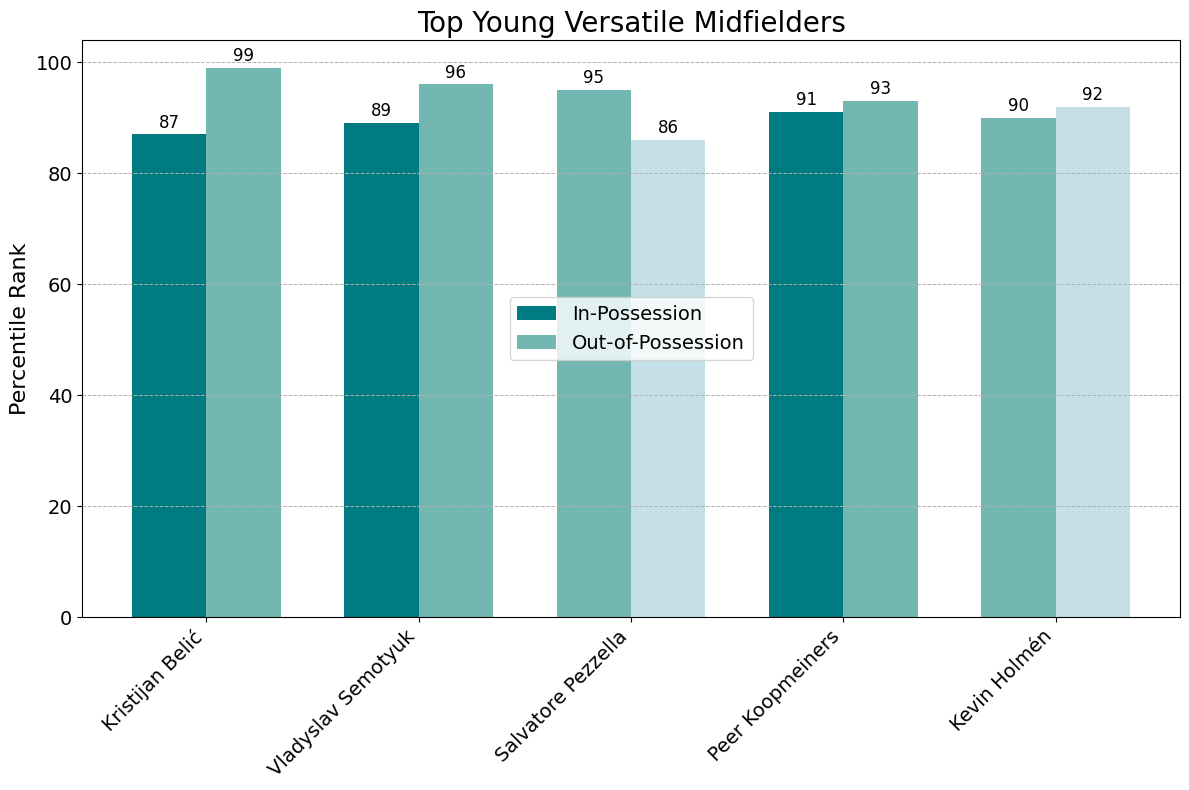

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data (replace with your actual data)
data = {
    'player_name': ['Kristijan Belić', 'Vladyslav Semotyuk', 'Salvatore Pezzella', 'Peer Koopmeiners', 'Kevin Holmén'],
    'in_possession_percentile': [87, 89, 95, 91, 90],
    'out_of_possession_percentile': [99, 96, 86, 93, 92]
}

df = pd.DataFrame(data)

# Colors for the bars
colors_in = ['#007b82' if player in ['Kristijan Belić', 'Vladyslav Semotyuk', 'Peer Koopmeiners'] else '#72b7b2' for player in df['player_name']]
colors_out = ['#72b7b2' if player in ['Kristijan Belić', 'Vladyslav Semotyuk', 'Peer Koopmeiners'] else '#c4dfe6' for player in df['player_name']]

# Create the bar chart
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(df))

# Plot in-possession scores
bars1 = plt.bar(index, df['in_possession_percentile'], bar_width, color=colors_in, label='In-Possession')

# Plot out-of-possession scores
bars2 = plt.bar([p + bar_width for p in index], df['out_of_possession_percentile'], bar_width, color=colors_out, label='Out-of-Possession')

# Add text labels
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, round(yval, 2), ha='center', va='bottom', fontsize=12)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Customize the plot
plt.title('Top Young Versatile Midfielders', fontsize=20)

plt.ylabel('Percentile Rank', fontsize=16)
plt.xticks([p + bar_width/2 for p in index], df['player_name'], rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='center', fontsize=14)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('top_versatile_players.png', format='png')

# Show the plot
plt.show()
